# Buscador de Llaves
### Ejemplo de Aplicación
Pensemos en un sistema que permita ser localizado a partir de la emisión de un sonido de alarma disparado ante la detección de un silbido.
Encuadremos nuestra aplicación en pensandolo como un producto que deberá competir con otros en precio y prestaciones.
Con el fin de simplificar el diseño mecánico del sistema, el dispositivo deberá detenerse cuando detecte 3 (tres) silbidos consecutivos.
<center><img src="silbido.png"></center>

Para manipular los archivos de audio desde la jupyter notebook se recomineda instalar *librosa*.


conda install -c conda-forge librosa

In [1]:
from scipy import fft
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.lib.display import Audio

In [2]:
Audio(filename='1_silbido.wav')

In [3]:
Audio(filename='3_silbido-artificial.wav')

In [4]:
################### Definición de señales #########################

                ##########   SEÑAL 1 #############

filename1 = '1_silbido.wav'          # nombre de archivo 1 silbido 
fs1, data1 = wavfile.read(filename1)   # frecuencia de muestreo y datos de la señal

# Parametros temporales para 1 silbido.
ts1 = 1 / fs1                     # tiempo de muestreo
N1 = len(data1)                   # número de muestras en el archivo de audio
t1 = np.linspace(0, N1 * ts1, N1)   # vector de tiempo
senial1 = data1 #[:, 1]            # se extrae un canal de la pista de audio (si el audio es estereo)
senial1 = senial1 * 3.3 / (2 ** 16 - 1) # se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)

                ##########   SEÑAL 2 #############

filename2 = '3_silbido-artificial.wav'          # nombre de archivo 3 silbidos
fs2, data2 = wavfile.read(filename2)   # frecuencia de muestreo y datos de la señal

# Parámetros temporales para 3 silbidos
ts2 = 1 / fs2                     # tiempo de muestreo
N2 = len(data2)                   # número de muestras en el archivo de audio
t2 = np.linspace(0, N2 * ts2, N2)   # vector de tiempo
senial2 = data2 #[:, 1]            # se extrae un canal de la pista de audio (si el audio es estereo)
senial2 = senial2 * 3.3 / (2 ** 16 - 1) # se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)



In [5]:
#################### Cálculo de la Transformada de Fourier ###################

                        ######## SEÑAL 1 ############

freq1 = fft.fftfreq(N1, d=1/fs1)   # se genera el vector de frecuencias
senial1_fft = fft.fft(senial1)    # se calcula la transformada rápida de Fourier

# El espectro es simétrico, nos quedamos solo con el semieje positivo
f1 = freq1[np.where(freq1 >= 0)]      
senial1_fft = senial1_fft[np.where(freq1 >= 0)]

# Se calcula la magnitud del espectro
senial1_fft_mod = np.abs(senial1_fft) / N1    # Respetando la relación de Parseval
# Al haberse descartado la mitad del espectro, para conservar la energía 
# original de la señal, se debe multiplicar la mitad restante por dos (excepto
# en 0 y fm/2)
senial1_fft_mod[1:len(senial1_fft_mod-1)] = 2 * senial1_fft_mod[1:len(senial1_fft_mod-1)]


                        ######## SEÑAL 2 ############

freq2 = fft.fftfreq(N2, d=1/fs2)   # se genera el vector de frecuencias
senial2_fft = fft.fft(senial2)    # se calcula la transformada rápida de Fourier

# El espectro es simétrico, nos quedamos solo con el semieje positivo
f2 = freq2[np.where(freq2 >= 0)]      
senial2_fft = senial2_fft[np.where(freq2 >= 0)]

# Se calcula la magnitud del espectro
senial2_fft_mod = np.abs(senial2_fft) / N2    # Respetando la relación de Parseval
# Al haberse descartado la mitad del espectro, para conservar la energía 
# original de la señal, se debe multiplicar la mitad restante por dos (excepto
# en 0 y fm/2)
senial2_fft_mod[1:len(senial2_fft_mod-1)] = 2 * senial2_fft_mod[1:len(senial2_fft_mod-1)]



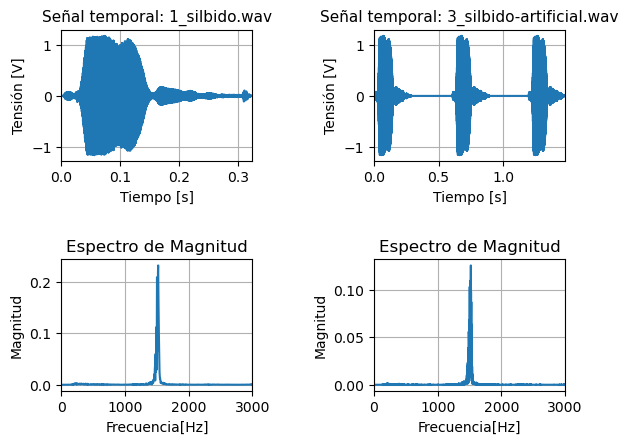

In [6]:
################### GRAFICACION DE SEÑALES ###################

#  señal temporal 1
plt.subplot (2, 2, 1)
plt.plot(t1, senial1)
plt.xlabel('Tiempo [s]', fontsize=10)
plt.ylabel('Tensión [V]', fontsize=10)
plt.title('Señal temporal: '+ filename1, fontsize=11)
plt.xlim([0, ts1*N1])
plt.grid()

#  señal temporal 2
plt.subplot (2, 2, 2)
plt.plot(t2, senial2)
plt.xlabel('Tiempo [s]', fontsize=10)
plt.ylabel('Tensión [V]', fontsize=10)
plt.title('Señal temporal: '+ filename2, fontsize=11)
plt.xlim([0, ts2*N2])
plt.grid() 

#  espectro de señal 1
plt.subplot (2, 2, 3)
plt.plot(f1, senial1_fft_mod)
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud')
plt.xlim (0, 3000)
plt.grid()

# espectro de señal 2
plt.subplot (2, 2, 4)
plt.plot(f2, senial2_fft_mod)
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud')
plt.xlim (0, 3000)
plt.grid()

plt.tight_layout(pad=2.0 , w_pad=2.5, h_pad=2.5 )
plt.show() 


In [11]:
###### Luego de analizar las alarmas en otro archivo, me quedo con "cooper_fulleon_sounder_tone_6.wav" ####

Audio (filename = 'alarmas/cooper_fulleon_sounder_tone_6.wav' )


In [8]:
filename_alarm = 'alarmas/cooper_fulleon_sounder_tone_6.wav'
fs, data_alarm = wavfile.read(filename_alarm)   # frecuencia de muestreo y datos de la señal

# Definición de parámetro temporales
ts = 1 / fs                     # tiempo de muestreo
N = len(data_alarm)                   # número de muestras en el archivo de audio
t = np.linspace(0, N * ts, N)   # vector de tiempo
senial_alarm = data_alarm #[:, 1]            # se extrae un canal de la pista de audio (si el audio es estereo)
senial_alarm = senial_alarm * 3.3 / (2 ** 16 - 1) # se escala la señal a voltios (considerando un CAD de 16bits y Vref 3.3V)

############## Datos frecuenciales ###############

freq = fft.fftfreq(N, d=1/fs)   # se genera el vector de frecuencias
senial_alarm_fft = fft.fft(senial_alarm)    # se calcula la transformada rápida de Fourier

# El espectro es simétrico, nos quedamos solo con el semieje positivo
f = freq[np.where(freq >= 0)]      
senial_alarm_fft = senial_alarm_fft[np.where(freq >= 0)]

# Se calcula la magnitud del espectro
senial_fft_mod = np.abs(senial_alarm_fft) / N    # Respetando la relación de Parseval
# Al haberse descartado la mitad del espectro, para conservar la energía 
# original de la señal, se debe multiplicar la mitad restante por dos (excepto
# en 0 y fm/2)
senial_fft_mod[1:len(senial_fft_mod-1)] = 2 * senial_fft_mod[1:len(senial_fft_mod-1)]


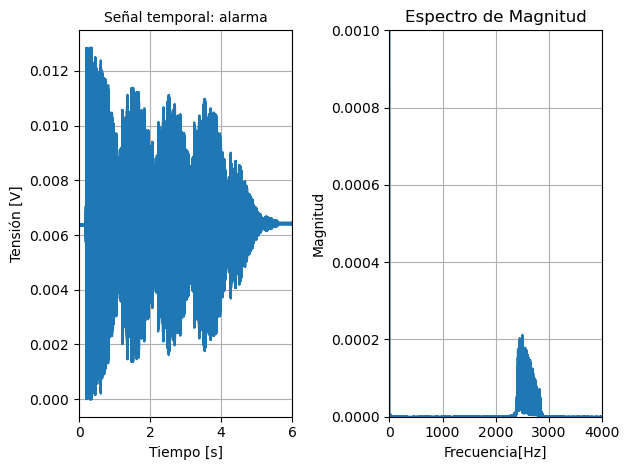

In [9]:
#### Graficacion de señal de alarma y su espectro ######

# Se grafica la señal temporal
plt.subplot (1, 2, 1 )
plt.plot(t, senial_alarm)
plt.xlabel('Tiempo [s]', fontsize=10)
plt.ylabel('Tensión [V]', fontsize=10)
plt.title('Señal temporal: alarma', fontsize=10)
plt.xlim([0, ts*N])
plt.grid()


#Ahora graficamos el espectro

plt.subplot (1, 2, 2 )
plt.plot(f,senial_fft_mod)
plt.grid()
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud')
plt.ylim (0, 0.001)
plt.xlim (0, 4000)

plt.tight_layout()
plt.show()

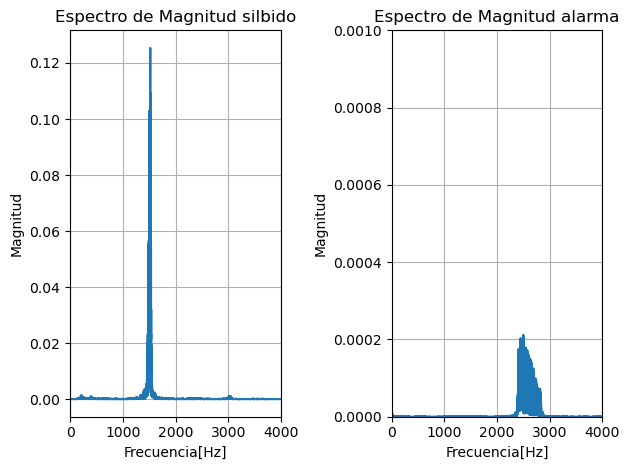

In [10]:
############# Graficacion de espectros de la señal de los silbidos y la alarma ###############

plt.subplot (1, 2, 1)
plt.plot(f2, senial2_fft_mod)
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud silbido')
plt.xlim (0, 4000)
plt.grid()

# espectro de señal 2
plt.subplot (1, 2, 2)
plt.plot(f, senial_fft_mod)
plt.xlabel("Frecuencia[Hz]")
plt.ylabel("Magnitud")
plt.title('Espectro de Magnitud alarma')
plt.xlim (0, 4000)
plt.ylim (0, 0.001)
plt.grid()

plt.tight_layout()
plt.show()

Como se puede observar los espectros frecuenciales muestran componentes diferentes entre silbido y la alarma elegida.
Esto significa que se podría implementar un sistema de detección con esta alarma, ya que no posee energia en 
la frecuencia donde el silbido tiene su mayor magnitud. 